In [1]:
import numpy as np
from utils.DCE_tools import load_dicom_4d, run_totalsegmentator

In [2]:
dicom_folder_path = 'Test/patient_dyn_path' #path to dicom folder
data_4d, dims = load_dicom_4d(dicom_folder_path, voxel_dims=True, verbose=True) #function can be use to load a 4D dicom folder

Processing Files: 100%|█████████████████████████████████████████████████████████| 15480/15480 [00:49<00:00, 312.74it/s]


Shape of 4D DICOM array: (215, 72, 224, 224)
With voxel dimension: 2.232143 x 2.232143 x 3.000000 mm^3


# 4D dataset case

The run_totalsegmentator function requires a numpy array as an input.
This input can be both 3D or 4D.

The first example bellow works for 4D arrays (format='4D').

ha_vol: is the timepoint/3D volume that will be use to segment the aorta. 


In [6]:
output_folder = 'Test/TotalSeg_output'
aorta_mask = run_totalsegmentator(data_4d, dims, output_folder, format='4D',
                                  ha_vol=0, task="total_mr", return_mask=True,
                                  quiet=True, verbose=True)


...<<Running TotalSegmentator>>...

...<<Masks created>>...


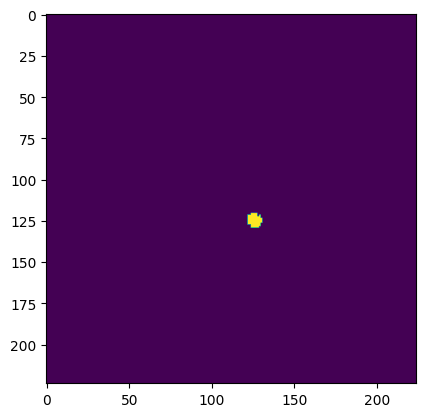

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(aorta_mask[45])
plt.show()

# 3D dataset case

The example bellow works for 3D arrays (format='3D').
ha_vol: is no longer required 

In [8]:
data3d = data_4d[0]
data3d.shape

(72, 224, 224)

In [9]:
output_folder = 'Test/TotalSeg_output'
aorta_mask = run_totalsegmentator(data3d, dims, output_folder, format='3D',
                                  task="total_mr", return_mask=True,
                                  quiet=True, verbose=True)


...<<Running TotalSegmentator>>...

...<<Masks created>>...


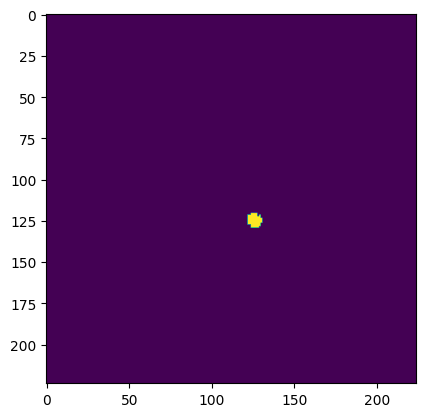

In [11]:
%matplotlib inline
plt.imshow(aorta_mask[45])